# Elementary Cellular Automata
### Ashton T. Sperry
#### ashton.sperry@ronininstitute.org

This notebook provides my code for one-dimensional (elementary) cellular automata. It plots every rule numbered from 0 to 255 and the corresponding automaton. This notebook contains a class to easily construct an initial array, a rule dictionary, and the final automaton of choice.

I combine three different approaches--in some cases nomenclature, in other cases functions--found at the following links: (1) https://www.youtube.com/watch?v=vhHuHXY04no; (2) https://www.youtube.com/watch?v=M_pkidxeGMY; and (3) https://github.com/AllenDowney/ThinkComplexity2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Cell1D:
    """Represents a 1D cellular automaton."""

    def __init__(self, rule, rows, cols = None):
        """Initializes the automaton.
        
        rule: an integer in the range 0-255.
        table: rule dictionary that maps from a triple to the next state.
        cell: the numpy array that represents the automaton and contains the data.
        next: the index of the next empty row."""
        
        self.table = self.dictionary(rule)
        self.rows = rows
        self.cols = 2 * rows + 1 if cols is None else cols
        
        self.cell = np.zeros((rows, self.cols), dtype = np.int8)
        self.next = 0
    
    def dictionary(self, rule):
        """Returns a dictionary for the given rule.  The dictionary
        maps a string to binary values."""
        
        table = {}
        keys = ['111', '110', '101', '100', '011', '010', '001', '000']
        
        bits = np.array([rule], dtype = np.uint8)
        nums = np.unpackbits(bits)
        for k, bit in enumerate(nums):
            table[keys[k]] = bit
        return table

    def init_single(self):
        """Starts with one cell in the middle of the top row."""
        self.cell[0, self.cols // 2] = 1
        self.next += 1

    def init_random(self):
        """Start with random values in the top row."""
        self.cell[0] = np.random.random(self.cols).round()
        self.next += 1

    def loop(self):
        """Executes the given number of time steps."""
        for i in range(self.rows - 1):
            self.step()

    def step(self):
        """Executes one time step by computing the next row of the array."""
        row = self.next
        c = self.cell
        t = self.table
        
        for col in range(1, self.cols - 1):
            c[row, col] = t[''.join(str(k) for k in list(c[row - 1, col - 1:col + 2]))]
        
        self.next += 1
    
    def plot_1D(self):
        fig = plt.figure(figsize=(13,13))
        plt.imshow(self.cell, cmap = 'binary', interpolation = 'none')
        plt.title('Rule: ' + str(rule), fontsize = 'x-large')
        plt.show()
        #fig.savefig('ECA_Rule110_Single', dpi = 300, format = 'png')
        plt.close(fig)

We only need a rule, the number of rows, and to initialize the automaton class.

In [3]:
rule = 0
rows = 100
cell = Cell1D(rule, rows)

First, create the dictionary with your rule input. Second, initialize the first row (either with a single cell or random cell of cells) of the automaton, Third, complete the automaton with the loop function. Fourth, plot the automaton.

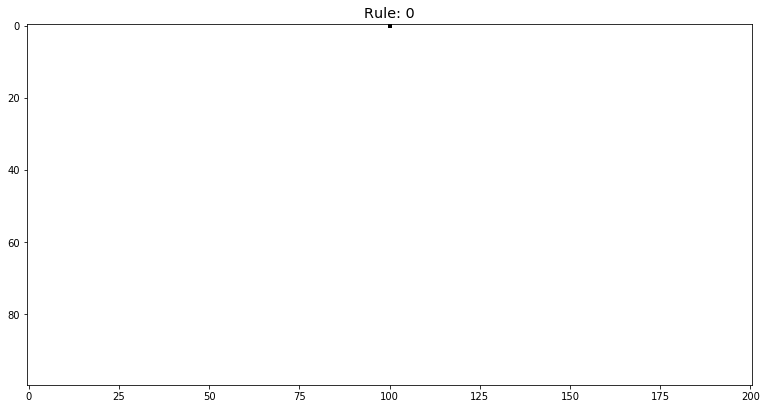

In [4]:
cell.dictionary(rule)
cell.init_single()
cell.loop()
cell.plot_1D()

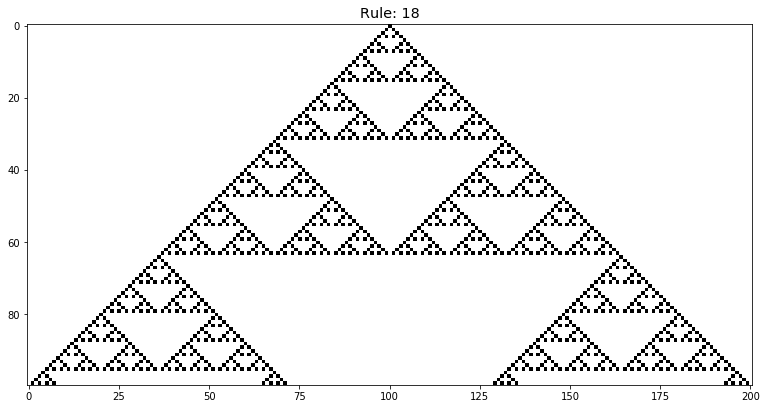

In [5]:
rule = 18
rows = 100
cell = Cell1D(rule, rows)

cell.dictionary(rule)
cell.init_single()
cell.loop()
cell.plot_1D()

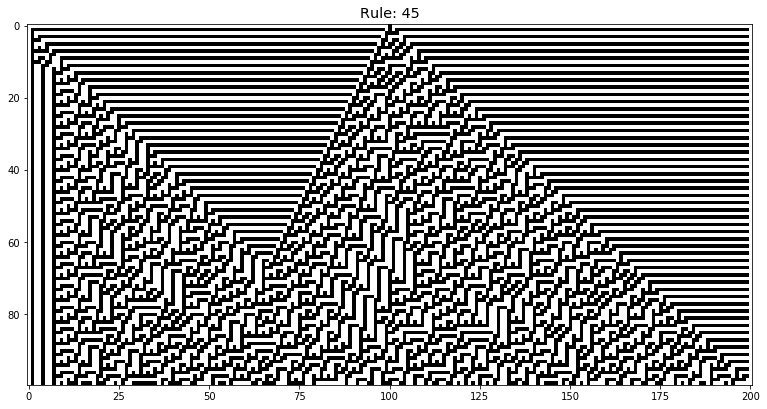

In [6]:
rule = 45
rows = 100
cell = Cell1D(rule, rows)

cell.dictionary(rule)
cell.init_single()
cell.loop()
cell.plot_1D()

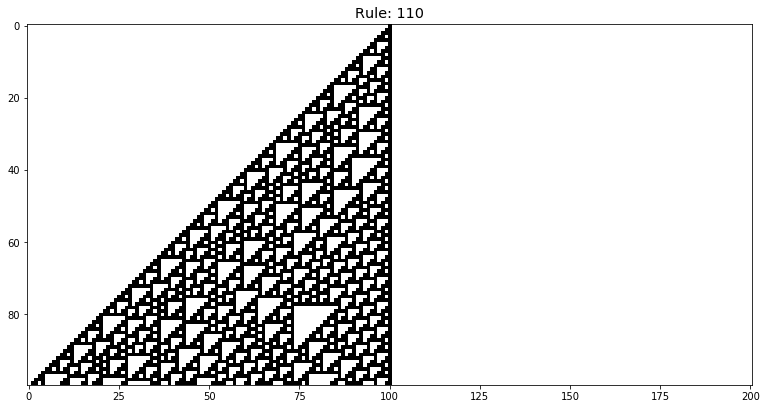

In [7]:
rule = 110
rows = 100
cell = Cell1D(rule, rows)

cell.dictionary(rule)
cell.init_single()
cell.loop()
cell.plot_1D()

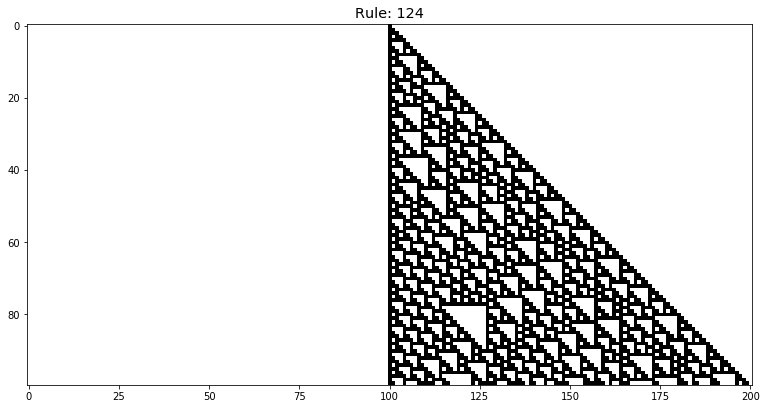

In [8]:
rule = 124
rows = 100
cell = Cell1D(rule, rows)

cell.dictionary(rule)
cell.init_single()
cell.loop()
cell.plot_1D()

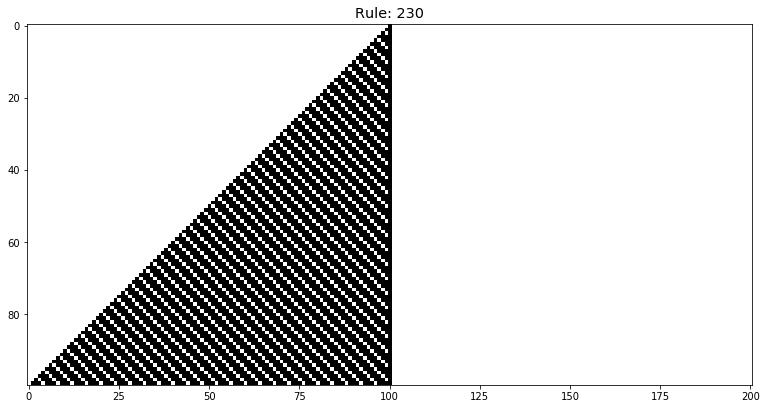

In [9]:
rule = 230
rows = 100
cell = Cell1D(rule, rows)

cell.dictionary(rule)
cell.init_single()
cell.loop()
cell.plot_1D()